In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

num_samples = 5
T2_dim = 100
D_dim = 100
T2_lable_dim = 100
D_label_dim = 100
num_DT = 5
max_D = 5.5
max_T2 = 1
floor_D = 1.5
floor_T2 = 0
min_sep_D = 0.5
min_sep_T2 = 0.12
sig_D = 0.08
sig_T2 = 0.02
floor_amp = 0.3

def gaussian_blind_noise(S, dB):
    """
    Add Gaussian noise to the input signal. The std of the gaussian noise is uniformly chosen between 0 and 1/sqrt(snr).
    """
    snr = np.exp(np.log(10) * float(dB) / 10)
    num_samples, signal_dim, num_fre = np.shape(S)
    noise_S = np.zeros([num_samples, signal_dim, num_fre])
    # sigma_max = np.sqrt(1. / snr)
    # sigmas = sigma_max * np.random.rand(num_samples)
    sigma = np.sqrt(1. / snr)

    for i in np.arange(num_samples):
        noise = np.random.randn(signal_dim, num_fre) * S[i, :, :]
        # mult = sigmas[i] * np.linalg.norm(s, 2) / (np.linalg.norm(noise, 2))
        mult = sigma * np.linalg.norm(S[i, :, :], ord='fro') / (np.linalg.norm(noise, ord='fro'))
        noise = noise * mult
        
        noise_S[i, :, :] = S[i, :, :] + noise
    return noise_S

# to generate gaussian distribution
def Gaussian_distribution(max_D, floor_D, avg, num, sig):
    avg = avg.T
    xgrid = np.linspace(floor_D, max_D, num)
    sqrt_2pi=np.power(2*np.pi,0.5)
    coef=1/(sqrt_2pi*sig)
    powercoef=-1/(2*np.power(sig,2))
    mypow=powercoef*(np.power((xgrid-avg),2))
    result = coef*(np.exp(mypow))
    result[np.isnan(result)] = 0
    return result/np.max(result)

S = np.zeros([num_samples+1, D_dim, T2_dim])
label = np.zeros([num_samples+1, D_label_dim, T2_lable_dim])
b = np.linspace(0.015, 1.5, 100)[:, np.newaxis]
t = np.linspace(0.02, 2, 100)[:, np.newaxis]
nDT = np.random.randint(1, num_DT + 1, num_samples)
# nDT[0] = 4

for i in np.arange(1, num_samples+1):
    D = np.ones([1, num_DT]).astype(float) * np.inf
    T2 = np.zeros([1, num_DT]).astype(float)
    signal = np.zeros([D_dim, T2_dim]).astype(float)
    label1 = np.zeros([D_label_dim, T2_lable_dim]).astype(float)
    labelD = np.zeros([1, D_label_dim]).astype(float)
    labelT2 = np.zeros([1, T2_lable_dim]).astype(float)

    for j in np.arange(i):
        D_value = np.random.random() * max_D
        condition = True
        while condition:
            D_value = np.random.random() * max_D
            condition = np.min(np.abs(D - D_value)) < min_sep_D or D_value < floor_D
        D[0, j] = D_value

        T2_value = np.random.random() * max_T2
        condition = True
        while condition:
            T2_value = np.random.random() * max_T2
            condition = np.min(np.abs(T2 - T2_value)) < min_sep_T2 or T2_value < floor_T2
        T2[0, j] = T2_value

    R = 1 / T2
    label_D = Gaussian_distribution(max_D, floor_D, D, D_label_dim, sig=sig_D)
    label_T2 = Gaussian_distribution(max_T2, floor_T2, T2, T2_lable_dim, sig=sig_T2)
    for j in np.arange(i):
        # amp = np.abs(np.random.randn()) + floor_amp
        amp = max(np.abs(np.random.rand()), floor_amp)
        signal = signal + amp * np.dot(np.exp(-b * D[0, j]), np.exp(-t * R[0, j]).T)
        label1 = label1 + amp * np.dot(label_D[j, :][:, np.newaxis], label_T2[j, :][np.newaxis, :])
        # label1 = label1 + np.dot(label_D[j, :][:, np.newaxis], label_T2[j, :][np.newaxis, :])
        # labelD = labelD + label_D[j, :][np.newaxis, :]
        # labelT2 = labelT2 + label_T2[j, :][np.newaxis, :]
        labelD = labelD + amp * label_D[j, :][np.newaxis, :]
        labelT2 = labelT2 + amp * label_T2[j, :][np.newaxis, :]
    S[i-1] = signal / np.max(signal)
    label[i-1] = label1 / np.max(label1)
    labeltest = np.dot(labelD.T, labelT2)
    sample = 0

/mnt/DATA1/chenbo/miniconda3/envs/ChineseNMT/lib/python3.7/site-packages/ipykernel_launcher.py:83: RuntimeWarning: divide by zero encountered in true_divide


In [ ]:
pad_labelD = labelD.T.repeat(100, axis=1)
pad_labelT2 = labelT2.repeat(100, axis=0)
result_label = pad_labelD * pad_labelT2

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

S = np.load('Dataset/val_input.npy')
label = np.load('Dataset/val_label.npy')

sample = np.random.randint(1000)
print('sample = ', sample)


sample =  451


/mnt/DATA1/chenbo/miniconda3/envs/ChineseNMT/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  import sys
/mnt/DATA1/chenbo/miniconda3/envs/ChineseNMT/lib/python3.7/site-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.


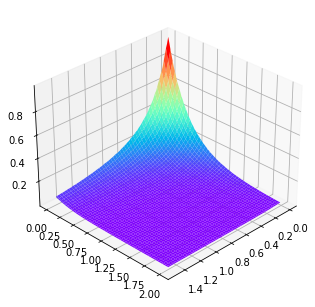

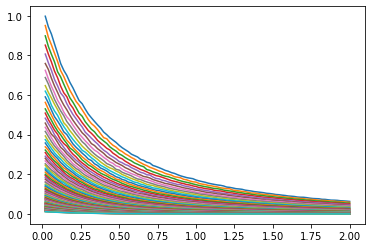

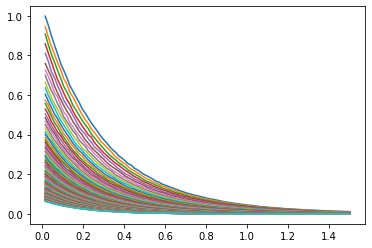

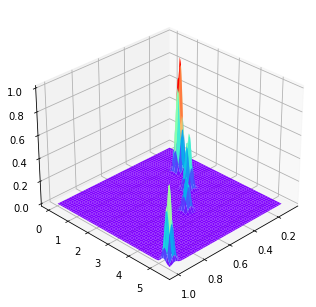

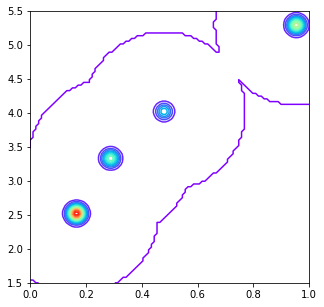

In [9]:
sample = 1
dB = 48
SN = gaussian_blind_noise(S, dB)
# SN = S

figure = plt.figure(1)
axes = Axes3D(figure)

X = np.linspace(0.015, 1.5, 100)
Y = np.linspace(0.02, 2, 100)

X,Y = np.meshgrid(X, Y)
Z = SN[sample]
axes.plot_surface(X,Y,Z,cmap='rainbow')
axes.view_init(elev=30,azim=45)

plt.figure(2)
for i in np.arange(100):
    # plt.plot(np.linspace(0.01, 1, 100), SN[sample, i, :] / np.max(SN[sample, i, :]))
    plt.plot(np.linspace(0.02, 2, 100), SN[sample, i, :])

plt.figure(3)
for j in np.arange(100):
    # plt.plot(np.linspace(0.01, 1, 100), SN[sample, :, j]/np.max(SN[sample, :, j]))
    plt.plot(np.linspace(0.015, 1.5, 100), SN[sample, :, j])

figure = plt.figure(4)
axes = Axes3D(figure)

X = np.linspace(0.1, 1, 100)
Y = np.linspace(0.0154, 5.5, 100)

X,Y = np.meshgrid(X, Y)
Z = label[sample]
axes.plot_surface(X,Y,Z,cmap='rainbow')
axes.view_init(elev=30,azim=45)

plt.figure(5, figsize=(5,5))
plt.contour(np.linspace(0, 1, 100), np.linspace(1.5, 5.5, 100), Z, 20, cmap='rainbow')
plt.show()

In [28]:
test_DT = np.load('./Dataset/test_DT.npy')
SN[5] = test_DT

np.save('./Dataset/test_input.npy', SN)
np.save('./Dataset/test_label.npy', label)

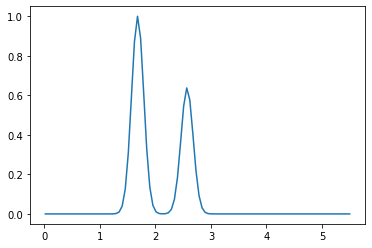

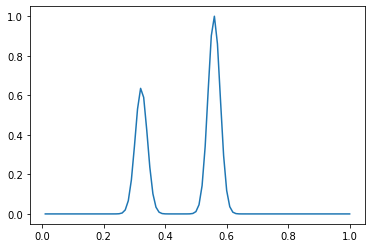

In [7]:
plt.figure(1)
# plt.plot(np.sum(label[sample], axis=1).T)
plt.plot(np.linspace(0.0154, 5.5, 100), np.sum(label[sample], axis=1).T / np.max(np.sum(label[sample], axis=1)))
# plt.figure(2)
# plt.plot(labelD.T)
plt.figure(2)
# plt.plot(np.sum(label[sample], axis=0).T)
plt.plot(np.linspace(0.01, 1, 100), np.sum(label[sample], axis=0).T / np.max(np.sum(label[sample], axis=0)))
# plt.figure(2)
# plt.plot(labelT2.T)

In [ ]:
import torch

torch_label = torch.from_numpy(label).float()
torch_labelD = torch.from_numpy(labelD).float()
torch_labelT2 = torch.from_numpy(labelT2).float()

rc_labelD = torch.sum(torch_label, dim=2).numpy()
rc_labelT2 = torch.sum(torch_label, dim=1).numpy()

plt.figure(1)
plt.plot(rc_labelD.T / np.sum(rc_labelD))
plt.plot(labelD.T / np.sum(labelD))
plt.figure(2)
plt.plot(rc_labelT2.T / np.sum(rc_labelT2))
plt.plot(labelT2.T / np.sum(labelT2))

In [ ]:
plt.figure(1)
plt.plot(label_D.T)
plt.figure(2)
plt.plot(label_T2.T)

In [ ]:
plt.figure(1)
for i in np.arange(100):
    plt.plot(b, S[0, i, :] / np.max(S[0, i, :]))

plt.figure(2)
for j in np.arange(100):
    plt.plot(t, S[0, :, j]/np.max(S[0, :, j]))